## 1. Simple `numpy` function

The first part of this assignment gives you practice with python and numpy syntax and the homework submission process. In the next cell, you will find the outline of a `python` function. Modify it to return a `5 x 5` identity matrix by filling in the following code:
```python
        A= np.eye(5)
```

In [1]:
import numpy as np

In [2]:
print(np.eye(5))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## 2 Linear regression with one variable

Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.\
The file `"Uni_linear.txt"` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables x and y:

In [3]:
import pandas as pd

In [4]:
chain_resturant = pd.read_csv("Uni_linear.txt", names= ["Population", "Profit"])
# type casting from pandas series to numpy array
X = np.array(chain_resturant["Population"])
y = np.array(chain_resturant["Profit"])
# size of dataset
number_of_samples = X.size
print('size of samples: {}'.format(number_of_samples))

size of samples: 97


In [5]:
chain_resturant.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
chain_resturant.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [7]:
print(f"Shape of X is: {X.shape}\nShape of y is: {y.shape}")

Shape of X is: (97,)
Shape of y is: (97,)


## 2.1 Plotting the Data

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

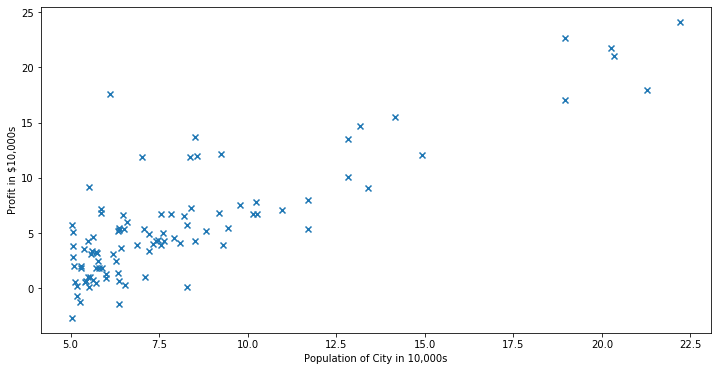

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(chain_resturant["Population"], chain_resturant["Profit"], marker= "x")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).


### 2.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

In [10]:
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(number_of_samples), X], axis=1)
print(f"Shape of X is: {X.shape}")

Shape of X is: (97, 2)


## 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `cost_function` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.
<a id="computeCost"></a>

In [11]:
def cost_function(X, y, theta):
    """
    comments
    """
    # size of dataset
    number_of_samples = y.size
    #initialize cost function with zero
    J = 0
    # hypothesis function
    h = np.dot(X, theta)
    # computation of cost function 
    J = (1/(2 * number_of_samples)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [16]:
J = cost_function(X, y, theta= np.array([0.0, 0.0]))
print("Cost computed: {:.2f} \nwith theta [0.0, 0.0]".format(J))
J = cost_function(X, y, theta= np.array([3.0, 2.0]))
print("Cost computed: {:.2f} \nwith theta [3.0, 2.0]".format(J))

Cost computed: 32.07 
with theta [0.0, 0.0]
Cost computed: 100.16 
with theta [3.0, 2.0]


#### 2.2.4 Gradient descent

Next, you will complete a function which implements gradient descent.\
As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradient_descent` calls `cost_function` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `cost_function` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.


In [13]:
def gradient_descent(X, y, theta, learning_rate, iteration):
    """
    comments
    """
    # number of elements or trainting examples
    number_of_samples = len(y)
    # make a copy of theta to avoid changing original array
    theta = theta.copy()
    J_history = []
    theta_history = []
    # loop through iterations
    for item in range(iteration):
        theta = theta - (learning_rate/number_of_samples) * (np.dot(X, theta) - y).dot(X)
        theta_history.append(theta)
        J_history.append(cost_function(X, y, theta))
    return theta, J_history, theta_history

In [14]:
# initial theta for starting cost_function and gradient_descent that is theta= [0,0]
theta = np.zeros(2)
# set learning_rate(alpha in original formula) and iteration(number of running algorithm)
learning_rate = .01
iteration = 1000
# running algorithm and store them variable and lists
theta, cost_function_history, theta_history = gradient_descent(X, y, theta, learning_rate, iteration)

In [17]:
print("Theta found by gradient descent: {:.4f}, {:.4f}".format(theta[0], theta[1]))

Theta found by gradient descent: -3.2414, 1.1273


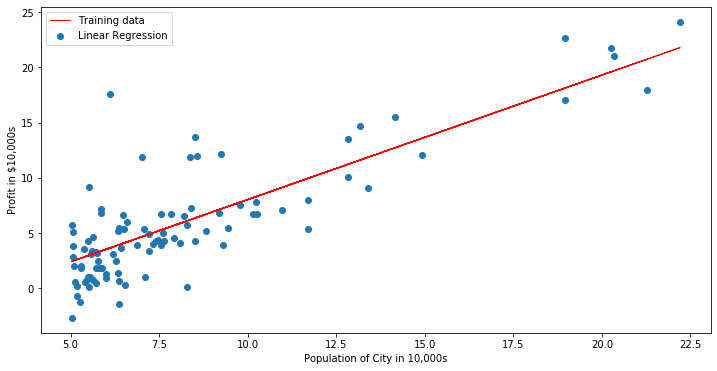

In [42]:
plt.figure(figsize=(12, 6))
plt.scatter(chain_resturant["Population"], chain_resturant["Profit"], marker= "o")
plt.plot(X[:,1], np.dot(X, theta), linewidth=1.0, c= "red")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(["Training data", "Linear Regression"])
plt.show()